# Estruturas criptográficas 2024-2025
**Grupo 02**

**Pg55986:** Miguel Ângelo Martins Guimarães 

**Pg55997:** Pedro Miguel Oliveira Carvalho 

### **Exercicio Dilithium (DSS):** 

## Introdução ao Dilithium
O Dilithium é um esquema de assinaturas digitais pós-quântico baseado em problemas de reticulados.

Este esquema pertence à familia de esquemas CRYSTALS ou 'Cryptographic Suite for Algebraic Lattices'.

O dilithium foi criado com as seguintes carateristicas em mente:
- Facil de implementar 
- Tamanho reduzido para a chave publica e a assinatura
- Modular 
- Os parâmetros são escolhidos considerando o pior cenário

### **Implementação do Dilithium**

#### **Parametros do algoritmo**
Para o anel os parametros são os seguintes:
**q** = 2^23 - 2^13 + 1

**n** = 256

**k** - Numero de colunas da matriz 

**l** - Numero de linhas da matriz

**η** - Numero de bound

#### **Criação da chave**

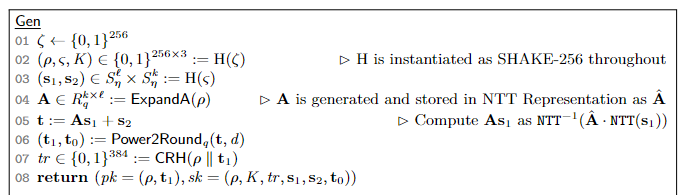

Para a criação de um par de chave valido em Dilithium primeiramente vamos criar uma seed 'mestra' aleatoria.

A seed 'mestra' vai ser criada utilizando ```os.urandom``` que recorre ao gerador de numeros aleatorios do sistema operativo, sendo recomendado para utilização em criptografia.

Atráves desta seed 'mestra' ζ vão ser derivadas outras 3 seeds:
- Seed ρ
- Seed ς
- Seed K

##### **Matriz A**

A derivação destas 3 seeds é realizada atráves da aplicação de uma função de **hashing XOF** na seed 'mestra', sendo que o resultado da aplicação da função de hashing é dividido em blocos de **32 bytes**, sendo que cada bloco é associado a uma seed diferente.

O proximo passo é construir a matriz A. Esta matriz vai ser construida atráves da seed ρ, sendo que vamos iterar todas as posições da matriz. Para cada posição da matriz vamos gerar uma seed unica recorrendo aos indices atuais da matriz, depois vamos alimentar esse valor à função de hash SHAKE-256.

Atráves deste output vai ser criado um polinomio, para cada coeficiente do polinomio vão ser extraidos 4 bytes, esses bytes vão ser passados para int modulo q e inserido no polinomio.

Para finalizar o polinomio em si é armazenado na posição atual da matriz.


##### **Vetores S1 e S2**
A seguir vão ser criados os vetores secretos S1 e S2.
- O vetor s1 vai ser constituido por ℓ polinomios.
- O vetor s2 vai ser constituido por 𝑘 polinomios.

Cada polinomio vai ter 𝑛 coeficientes (256).

O valor η vai definir o bound para cada coeficiente, sendo que cada coeficiente tem de satizfazer a seguinte propriedade:

-η <= s[x] <= η 

A criação dos valores dos coeficientes é realizada de forma aleatoria.

Depois de se calcular os vetores vai ser calculado o valor T atráves da seguinte formula: t = A*s1 + s2

Após calcular o T vamos realizar um rounding obtendo t0 e t1.

Atráves destes valores vamos calcular as chaves publica e privada.

Primeiro vamos calcular o hash da chave publica utilizando a seed ρ 

Depois vamos calcular as chaves publica e privada das seguinte forma:

```
public_key = (seed_rho, t_high)
private_key = (seed_rho, seed_key, public_key_hash, secret_s1, secret_s2, t_low, matrix_a)
```

### Criação da assinatura

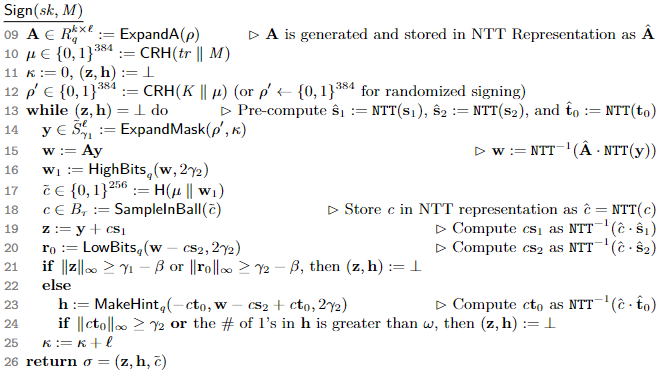

Para criar a assinatura é criada uma hash utilizando a hash da chave publica.

Depois vai ser gerado um vetor y, que vai ser utilizado para mascarar a parte secreta ao construir o candidato da assinatura, o ruido impede um atacante de descobrir s1.

O vetor Y É constituido por polinomios gerados com coeficientes aleatorios.

Depois vamos calcular w = A*y

Vamos pegar no vetor w e pegar na parte alta e na parte baixa do mesmo.

A seguir é criado um challenge seed em que concatenamos o message hash e os high bits do w.

Depois criamos o challenge c utilizando o challenge seed que gera um polinômio com apenas alguns coeficientes +1 ou –1 e todos os outros zero, ligando o desafio tanto à mensagem quanto ao valor “alto” de w.

A seguir criamos o candidato z = y + c * s1

Depois calculamos r0 = Wlow - c * s2

Criamos o vetor hints para indicar onde ocorreram os “carries” ao recompor a parte alta de w e assim permitir ao verificador corrigir w´1 sem revelar s2.

Depois calculamos a assinatura criando o tripo (z,h,c)

Todo este processo ocorre dentro de um loop while porque nem todo o Y criado produz um z e h validos.

### Verificação de assinatura

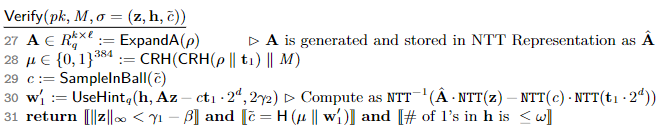

Para realizar a verificação da assinatura extraimos do seed_rho e o t_high da chave pública.

**0-** Extraimos o z, hints e c da assinatura.

**1-** Recalculamos o hash da chave publica: hash de (seed_rho || t_high).

**2-** Recalculamos o hash da mensagem: hash de (hash da chave pública || mensagem).

**3-** Verifica a norma infinito de z; se for ≥ (γ1 − β), rejeitamos.

**4-** Recria a matriz pública A a partir de seed_rho.

**5-** Calculamos A * z.

**6-** Multiplicamos cada polinômio de t_high por 2^d (d = POWER_OF_TWO).

**7-** Calculamos c * (t_high * 2^d).

**8-** Formamos w' = A z − c * (t_high * 2^d).

**9-** Separamos w' em w'_high (parte alta) e w'_low (parte baixa).

**10-** Contamos quantos coeficientes = 1 existem em todos os polinômios de hints, se exceder ω, rejeitamos.

**11-** Aplicamos cada hint para corrigir: geramos w_corrected usando w'_low, w'_high e hints.

**12-** Recriamos o desafio de verificação: hash de (hash da mensagem !! w_corrected_high) e amostragem de τ coeficientes +-1.

**13-** Compara o desafio recriado com o c original, se forem iguais, aceitamos. Caso contrário, rejeitamos.

















